![](https://www.science-accueil.org/wp-content/uploads/2021/11/assurance-maladie-logo-png.png)

The files studied here come from the French social security database.
It contains data on medications dispensed (number of boxes) and reimbursed by social security in town only (not hospital), whether they were prescribed by hospital or city prescribers.
City prescribers are independent practitioners working in private practice or clinics. While hospital prescribers work as employees.
You can find files at the folowing link : https://www.assurance-maladie.ameli.fr/etudes-et-donnees/medicaments-classe-atc-medicam

In [70]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import duckdb as db
import re

In [2]:
#Import datas
med_2021_1 = pd.read_excel('../raw_data/2021_head.xlsx', sheet_name='2021_atc2_100_et_non_a_100', skiprows=5)
med_2021_2 = pd.read_excel('../raw_data/2021_tail.xlsx', sheet_name='2021_atc2_100_et_non_a_100', skiprows=5)
med_2022_1 = pd.read_excel('../raw_data/2022_head.xlsx', sheet_name='2022_atc2_100_et_non_a_100', skiprows=5)
med_2022_2 = pd.read_excel('../raw_data/2022_tail.xlsx', sheet_name='2022_atc2_100_et_non_a_100', skiprows=5)
med_2023_1 = pd.read_excel('../raw_data/2023_head.xlsx', sheet_name='2023_atc2_100_et_non_a_100', skiprows=5)
med_2023_2 = pd.read_excel('../raw_data/2023_tail.xlsx', sheet_name='2023_atc2_100_et_non_a_100', skiprows=5)
med_2024_1 = pd.read_excel('../raw_data/2024_head.xlsx', sheet_name='2024_atc2_100_et_non_a_100', skiprows=5)
med_2024_2 = pd.read_excel('../raw_data/2024_tail.xlsx', sheet_name='2024_atc2_100_et_non_a_100', skiprows=5)

In [134]:
#Merge year
year_2021 = pd.merge(med_2021_1,med_2021_2, left_index=True, right_index=True)
year_2022 = pd.merge(med_2022_1,med_2022_2, left_index=True, right_index=True)
year_2023 = pd.merge(med_2023_1,med_2023_2, left_index=True, right_index=True)
year_2024 = pd.merge(med_2024_1,med_2024_2, left_index=True, right_index=True)

In [106]:
print(list(all_years.columns))

['Code ATC2_x', 'Libellé ATC2_x', 'Taux de remboursement_x', 'Base de remboursement 2021-01', 'Nombre de boites remboursées \n2021-01', 'Montant remboursé \n2021-01', 'Base de remboursement 2021-02', 'Nombre de boites remboursées \n2021-02', 'Montant remboursé \n2021-02', 'Base de remboursement 2021-03', 'Nombre de boites remboursées \n2021-03', 'Montant remboursé \n2021-03', 'Base de remboursement 2021-04', 'Nombre de boites remboursées \n2021-04', 'Montant remboursé \n2021-04', 'Base de remboursement 2021-05', 'Nombre de boites remboursées \n2021-05', 'Montant remboursé \n2021-05', 'Base de remboursement 2021-06', 'Nombre de boites remboursées \n2021-06', 'Montant remboursé \n2021-06', 'Code ATC2_y', 'Libellé ATC2_y', 'Taux de remboursement_y', 'Base de remboursement 2021-07', 'Nombre de boites remboursées \n2021-07', 'Montant remboursé \n2021-07', 'Base de remboursement 2021-08', 'Nombre de boites remboursées \n2021-08', 'Montant remboursé \n2021-08', 'Base de remboursement 2021-09'

In [ ]:
### à optimiser

#pd.reset_option('display.float_format')
pd.set_option('display.float_format', lambda x: '%.2f' % x)
#pd.options.display.float_format = '{:20,.2f}'.format

In [108]:
#Function to round to 2 digits
def round_number(dataframe, decimales=2):

    for df in dataframe : 

        for col in df.select_dtypes(include='number').columns:
            df[col] = df[col].round()

#Function to replace columns names
def replace_column_name(dataframe):
    for df in dataframe :
        df.columns = [col_name.replace(' ', '_') for col_name in df.columns]

#Drop unnecessary columns
def drop_columns(dataframe):
    col_to_drop = ['Code_ATC2_y', 'Libellé_ATC2_y', 'Taux_de_remboursement_y']

    for df in dataframe :
        df.drop(columns=col_to_drop, inplace = True)

#Rename columns
def rename_column(dataframe):
    col_to_rename = {'Code_ATC2_x' : 'Code_ATC2',
                     'Libellé_ATC2_x' : 'Libelle_ATC2',
                     'Taux_de_remboursement_x' : 'Taux_de_remboursement'
                     }

    for df in dataframe :
        df.rename(columns=col_to_rename, inplace = True)

#Months
def extract_month(dataframe) :
    for df in dataframe:
        df.insert(3, 'Mois', df.columns[3][-2:])

#Years
def extract_year(dataframe) :
    for df in dataframe:
        df.insert(3, 'Année', df.columns[4][-7:-3])

#Remove end of columns titles
def remove_end_columns(dataframe) :
    for df in dataframe :
        for col in df.columns[5:]:
            new_col_name = col[:-8].rstrip('_')
            df.rename(columns = {col: new_col_name}, inplace =True)            

In [135]:
dataframe = [year_2021, year_2022, year_2023, year_2024]
round_number(dataframe, decimales=2)
replace_column_name(dataframe)
drop_columns(dataframe)
rename_column(dataframe)
extract_month(dataframe)
extract_year(dataframe)
remove_end_columns(dataframe)

In [136]:
dataframes = [year_2021, year_2022, year_2023, year_2024]
all_years = pd.concat(dataframes, axis=0)

In [ ]:
year_2021[['Année', 'Mois']].pd

Code_ATC2                        object
Libelle_ATC2                     object
Taux_de_remboursement            object
Année                            object
Mois                             object
Base_de_remboursement           float64
Nombre_de_boites_remboursées      int64
Montant_remboursé               float64
Base_de_remboursement           float64
Nombre_de_boites_remboursées      int64
Montant_remboursé               float64
Base_de_remboursement           float64
Nombre_de_boites_remboursées      int64
Montant_remboursé               float64
Base_de_remboursement           float64
Nombre_de_boites_remboursées      int64
Montant_remboursé               float64
Base_de_remboursement           float64
Nombre_de_boites_remboursées      int64
Montant_remboursé               float64
Base_de_remboursement           float64
Nombre_de_boites_remboursées      int64
Montant_remboursé               float64
Base_de_remboursement           float64
Nombre_de_boites_remboursées      int64


In [145]:
year_2021['Jour'] = 1
year_2021['date'] = pd.to_datetime(year_2021[['Année', 'Mois', 'Jour']])

ValueError: to assemble mappings requires at least that [year, month, day] be specified: [day,month,year] is missing

In [123]:
year_2021.columns

Index(['Code_ATC2', 'Libelle_ATC2', 'Taux_de_remboursement', 'Année', 'Mois',
       'Base_de_remboursement', 'Nombre_de_boites_remboursées',
       'Montant_remboursé', 'Base_de_remboursement',
       'Nombre_de_boites_remboursées', 'Montant_remboursé',
       'Base_de_remboursement', 'Nombre_de_boites_remboursées',
       'Montant_remboursé', 'Base_de_remboursement',
       'Nombre_de_boites_remboursées', 'Montant_remboursé',
       'Base_de_remboursement', 'Nombre_de_boites_remboursées',
       'Montant_remboursé', 'Base_de_remboursement',
       'Nombre_de_boites_remboursées', 'Montant_remboursé',
       'Base_de_remboursement', 'Nombre_de_boites_remboursées',
       'Montant_remboursé', 'Base_de_remboursement',
       'Nombre_de_boites_remboursées', 'Montant_remboursé',
       'Base_de_remboursement', 'Nombre_de_boites_remboursées',
       'Montant_remboursé', 'Base_de_remboursement',
       'Nombre_de_boites_remboursées', 'Montant_remboursé',
       'Base_de_remboursement', 'Nomb

In [23]:
year_2021.columns

Index(['Code_ATC2', 'Libelle_ATC2', 'Taux_de_remboursement',
       'Base_de_remboursement_2021-01',
       'Nombre_de_boites_remboursées_\n2021-01', 'Montant_remboursé_\n2021-01',
       'Base_de_remboursement_2021-02',
       'Nombre_de_boites_remboursées_\n2021-02', 'Montant_remboursé_\n2021-02',
       'Base_de_remboursement_2021-03',
       'Nombre_de_boites_remboursées_\n2021-03', 'Montant_remboursé_\n2021-03',
       'Base_de_remboursement_2021-04',
       'Nombre_de_boites_remboursées_\n2021-04', 'Montant_remboursé_\n2021-04',
       'Base_de_remboursement_2021-05',
       'Nombre_de_boites_remboursées_\n2021-05', 'Montant_remboursé_\n2021-05',
       'Base_de_remboursement_2021-06',
       'Nombre_de_boites_remboursées_\n2021-06', 'Montant_remboursé_\n2021-06',
       'Base_de_remboursement_2021-07',
       'Nombre_de_boites_remboursées_\n2021-07', 'Montant_remboursé_\n2021-07',
       'Base_de_remboursement_2021-08',
       'Nombre_de_boites_remboursées_\n2021-08', 'Montant_r

In [15]:
# Calculation of the number of boxes delivered for each drug in 2022 and 2023
tt_def['nb_boite_remboursée_2022'] = tt_def['Nombre de boites remboursées \n2022-01'] + tt_def['Nombre de boites remboursées \n2022-02'] + tt_def['Nombre de boites remboursées \n2022-03'] + tt_def['Nombre de boites remboursées \n2022-04'] + tt_def['Nombre de boites remboursées \n2022-05'] + tt_def['Nombre de boites remboursées \n2022-06'] + tt_def['Nombre de boites remboursées \n2022-07'] + tt_def['Nombre de boites remboursées \n2022-08'] + tt_def['Nombre de boites remboursées \n2022-09'] + tt_def['Nombre de boites remboursées \n2022-10'] + tt_def['Nombre de boites remboursées \n2022-11'] + tt_def['Nombre de boites remboursées \n2022-12']
tt_def['nb_boite_remboursée_2023'] = tt_def['Nombre de boites remboursées \n2023-01'] + tt_def['Nombre de boites remboursées \n2023-02'] + tt_def['Nombre de boites remboursées \n2023-03'] + tt_def['Nombre de boites remboursées \n2023-04'] + tt_def['Nombre de boites remboursées \n2023-05'] + tt_def['Nombre de boites remboursées \n2023-06'] + tt_def['Nombre de boites remboursées \n2023-07'] + tt_def['Nombre de boites remboursées \n2023-08'] + tt_def['Nombre de boites remboursées \n2023-09'] + tt_def['Nombre de boites remboursées \n2023-10'] + tt_def['Nombre de boites remboursées \n2023-11'] + tt_def['Nombre de boites remboursées \n2023-12']

### The amount reimbursed is equal to the reimbursement base multiplied by the reimbursement rate.

# Calculation of the amount reimbursed for each medication in 2022 and 2023
tt_def['montant_remboursé_2022'] = tt_def['Montant remboursé \n2022-01'] + tt_def['Montant remboursé \n2022-02'] + tt_def['Montant remboursé \n2022-03'] + tt_def['Montant remboursé \n2022-04'] + tt_def['Montant remboursé \n2022-05'] + tt_def['Montant remboursé \n2022-06'] + tt_def['Montant remboursé \n2022-07'] + tt_def['Montant remboursé \n2022-08'] + tt_def['Montant remboursé \n2022-09'] + tt_def['Montant remboursé \n2022-10'] + tt_def['Montant remboursé \n2022-11'] + tt_def['Montant remboursé \n2022-12']
tt_def['montant_remboursé_2023'] = tt_def['Montant remboursé \n2023-01'] + tt_def['Montant remboursé \n2023-02'] + tt_def['Montant remboursé \n2023-03'] + tt_def['Montant remboursé \n2023-04'] + tt_def['Montant remboursé \n2023-05'] + tt_def['Montant remboursé \n2023-06'] + tt_def['Montant remboursé \n2023-07'] + tt_def['Montant remboursé \n2023-08'] + tt_def['Montant remboursé \n2023-09'] + tt_def['Montant remboursé \n2023-10'] + tt_def['Montant remboursé \n2023-11'] + tt_def['Montant remboursé \n2023-12']

In [17]:
tt_def.head()

,CIP13,NOM_COURT,PRODUIT,Code_EphMRA,Classe_EphMRA,Code_nATC,Classe_nATC,Code_nATC_2,Libelle_nATC_2,Base de remboursement 2022-01,Nombre de boites remboursées \n2022-01,Montant remboursé \n2022-01,Base de remboursement 2022-02,Nombre de boites remboursées \n2022-02,Montant remboursé \n2022-02,Base de remboursement 2022-03,Nombre de boites remboursées \n2022-03,Montant remboursé \n2022-03,Base de remboursement 2022-04,Nombre de boites remboursées \n2022-04,Montant remboursé \n2022-04,Base de remboursement 2022-05,Nombre de boites remboursées \n2022-05,Montant remboursé \n2022-05,Base de remboursement 2022-06,Nombre de boites remboursées \n2022-06,Montant remboursé \n2022-06,Base de remboursement 2022-07,Nombre de boites remboursées \n2022-07,Montant remboursé \n2022-07,Base de remboursement 2022-08,Nombre de boites remboursées \n2022-08,Montant remboursé \n2022-08,Base de remboursement 2022-09,Nombre de boites remboursées \n2022-09,Montant remboursé \n2022-09,Base de remboursement 2022-10,Nombre de boites remboursées \n2022-10,Montant remboursé \n2022-10,Base de remboursement 2022-11,Nombre de boites remboursées \n2022-11,Montant remboursé \n2022-11,Base de remboursement 2022-12,Nombre de boites remboursées \n2022-12,Montant remboursé \n2022-12,Base de remboursement 2023-01,Nombre de boites remboursées \n2023-01,Montant remboursé \n2023-01,Base de remboursement 2023-02,Nombre de boites remboursées \n2023-02,Montant remboursé \n2023-02,Base de remboursement 2023-03,Nombre de boites remboursées \n2023-03,Montant remboursé \n2023-03,Base de remboursement 2023-04,Nombre de boites remboursées \n2023-04,Montant remboursé \n2023-04,Base de remboursement 2023-05,Nombre de boites remboursées \n2023-05,Montant remboursé \n2023-05,Base de remboursement 2023-06,Nombre de boites remboursées \n2023-06,Montant remboursé \n2023-06,Base de remboursement 2023-07,Nombre de boites remboursées \n2023-07,Montant remboursé \n2023-07,Base de remboursement 2023-08,Nombre de boites remboursées \n2023-08,Montant remboursé \n2023-08,Base de remboursement 2023-09,Nombre de boites remboursées \n2023-09,Montant remboursé \n2023-09,Base de remboursement 2023-10,Nombre de boites remboursées \n2023-10,Montant remboursé \n2023-10,Base de remboursement 2023-11,Nombre de boites remboursées \n2023-11,Montant remboursé \n2023-11,Base de remboursement 2023-12,Nombre de boites remboursées \n2023-12,Montant remboursé \n2023-12,nb_boite_remboursée_2022,nb_boite_remboursée_2023,montant_remboursé_2022,montant_remboursé_2023
0,3400921604696,"YELLOX 0,9MG/ML COLLY FL5ML 1",YELLOX,S01R,ANTIINFLAMMATOIRES NON STEROIDIENS OPHTALMIQUES,S01BC11,BROMFENAC,S01,MEDICAMENTS OPHTALMOLOGIQUES,28867.32,7889,20057.44,29878.63,8113,20742.46,37251.96,10170,25792.02,30903.53,8381,21327.44,33579.20,9144,23226.93,33597.49,9126,23222.40,23220.61,6308,16063.09,19361.59,5182,13545.43,32502.99,8810,22433.51,31748.18,8662,21933.02,30979.15,8412,21422.20,22065.78,5930,15316.70,30866.78,8413,21433.32,28488.56,7762,19670.43,35492.13,9635,24578.17,28523.51,7741,19721.70,29030.98,7927,20054.07,32480.93,8832,22505.52,22612.74,6129,15722.82,18210.78,4913,12687.40,28202.39,7662,19553.56,32214.22,8775,22254.08,29857.60,8130,20637.09,25906.32,7064,17953.83,96127,92983,245082.62,236771.99
1,3400921606010,ESOMEPRAZOLE RPG 40MG CPR 28,ESOMEPRAZOLE RPG,A02B2,INHIBITEURS DE LA POMPE A PROTONS,A02BC05,ESOMEPRAZOLE,A02,MEDICAMENTS POUR LES TROUBLES DE L'ACIDITE,0.00,0,0.00,0.00,0,0.00,0.00,0,0.00,0.00,0,0.00,0.00,0,0.00,4.10,1,4.10,0.00,0,0.00,0.00,0,0.00,0.00,0,0.00,0.00,0,0.00,4.04,1,2.63,0.00,0,0.00,0.00,0,0.00,2.19,1,1.42,2.19,1,1.42,0.00,0,0.00,0.00,0,0.00,0.00,0,0.00,0.00,0,0.00,0.00,0,0.00,0.00,0,0.00,0.00,0,0.00,0.00,0,0.00,0.00,0,0.00,2,2,6.73,2.85
2,3400921609080,"AVONEX 0,03MG/0,5ML SOL INJ STYLO 4",AVONEX,L03B2,"INTERFERONS, BETA",L03AB07,INTERFERON BETA-1A,L03,IMMUNOSTIMULANTS,1459469.88,2119,1449071.76,1296425.71,2050,1282091.88,1462542.40,2319,1449226.56,1312192.82,2080,1298997.53,1405295.56,2229,1

In [18]:
tt_def[tt_def.isnull().any(axis=1)]

,CIP13,NOM_COURT,PRODUIT,Code_EphMRA,Classe_EphMRA,Code_nATC,Classe_nATC,Code_nATC_2,Libelle_nATC_2,Base de remboursement 2022-01,Nombre de boites remboursées \n2022-01,Montant remboursé \n2022-01,Base de remboursement 2022-02,Nombre de boites remboursées \n2022-02,Montant remboursé \n2022-02,Base de remboursement 2022-03,Nombre de boites remboursées \n2022-03,Montant remboursé \n2022-03,Base de remboursement 2022-04,Nombre de boites remboursées \n2022-04,Montant remboursé \n2022-04,Base de remboursement 2022-05,Nombre de boites remboursées \n2022-05,Montant remboursé \n2022-05,Base de remboursement 2022-06,Nombre de boites remboursées \n2022-06,Montant remboursé \n2022-06,Base de remboursement 2022-07,Nombre de boites remboursées \n2022-07,Montant remboursé \n2022-07,Base de remboursement 2022-08,Nombre de boites remboursées \n2022-08,Montant remboursé \n2022-08,Base de remboursement 2022-09,Nombre de boites remboursées \n2022-09,Montant remboursé \n2022-09,Base de remboursement 2022-10,Nombre de boites remboursées \n2022-10,Montant remboursé \n2022-10,Base de remboursement 2022-11,Nombre de boites remboursées \n2022-11,Montant remboursé \n2022-11,Base de remboursement 2022-12,Nombre de boites remboursées \n2022-12,Montant remboursé \n2022-12,Base de remboursement 2023-01,Nombre de boites remboursées \n2023-01,Montant remboursé \n2023-01,Base de remboursement 2023-02,Nombre de boites remboursées \n2023-02,Montant remboursé \n2023-02,Base de remboursement 2023-03,Nombre de boites remboursées \n2023-03,Montant remboursé \n2023-03,Base de remboursement 2023-04,Nombre de boites remboursées \n2023-04,Montant remboursé \n2023-04,Base de remboursement 2023-05,Nombre de boites remboursées \n2023-05,Montant remboursé \n2023-05,Base de remboursement 2023-06,Nombre de boites remboursées \n2023-06,Montant remboursé \n2023-06,Base de remboursement 2023-07,Nombre de boites remboursées \n2023-07,Montant remboursé \n2023-07,Base de remboursement 2023-08,Nombre de boites remboursées \n2023-08,Montant remboursé \n2023-08,Base de remboursement 2023-09,Nombre de boites remboursées \n2023-09,Montant remboursé \n2023-09,Base de remboursement 2023-10,Nombre de boites remboursées \n2023-10,Montant remboursé \n2023-10,Base de remboursement 2023-11,Nombre de boites remboursées \n2023-11,Montant remboursé \n2023-11,Base de remboursement 2023-12,Nombre de boites remboursées \n2023-12,Montant remboursé \n2023-12,nb_boite_remboursée_2022,nb_boite_remboursée_2023,montant_remboursé_2022,montant_remboursé_2023
1993,3400928099723,TUBERSOL (DERIVE PROTEINIQUE PURIFIE DE TUBERC...,TUBERSOL (DERIVE PROTEINIQUE PURIFIE DE TUBERC...,X,CLASSE NON DETERMINEE,NaN,NaN,NaN,NaN,38284.75,4815,25235.20,16562.54,2066,10937.71,8767.92,1093,5779.04,5189.58,643,3433.33,5203.21,645,3416.66,5065.48,623,3309.99,416066.92,21260,385748.81,445025.21,22739,414100.53,448637.65,22904,415940.49,451303.06,23070,418341.60,488716.33,24970,451565.73,511171.70,26116,472424.79,2569.56,196,1758.05,2648.22,202,1824.91,3172.62,242,2163.15,2569.56,196,1794.76,3028.41,231,2129.06,2831.76,216,1986.82,120061.33,23706,88376.59,109588.55,21624,80966.75,115496.99,22786,84728.75,127417.33,25146,93501.71,121131.18,23917,88869.79,129578.87,25590,95318.03,150944,144052,2610233.88,543418.37
5753,3400931465201,IPECA COMP BOIR GRLS TB80,IPECA COMP BOIR GRLS TB,X,CLASSE NON DETERMINEE,NaN,NaN,NaN,NaN,19.91,14,3.19,34.65,24,5.20,50.45,32,6.90,24.02,14,3.60,41.33,26,5.13,44.96,35,7.87,127392.81,8941,114709.23,106141.99,7413,95465.76,95299.77,6603,85364.22,133616.96,9280,119686.29,155423.86,10722,139410.38,150226.37,10267,134711.51,78128.84,7948,74528.11,36742.65,3750,35134.36,32887.82,3526,31312.57,86841.58,9317,82819.53,155936.49,16731,148920.36,200204.96,21481,191298.94,180769.32,26918,80933.13,179970.88,26768,81336.66,163409.42,24299,72386.65,170799.16,25385,75779.07,196523.39,29183,87532.21,140631.01,20854,62408.85,53371,216160,689379.28,1024390.46
13954,3400949500871,"OLANZAPINE MYLAN 10 MG 1 BOITE DE 28, 

In [19]:
tt_def.shape

(14194, 85)

In [20]:
a_sort = tt_def['Classe_EphMRA'].unique()
a_sort.sort()
print(a_sort)

['ACTH' 'AGENT SYSTEMIQUE POUR INFECTIONS FONGIQUES' 'AGENTS ALKYLANTS'
 'AGENTS CHELATEURS DU FER' 'AGONISTES DE LA THROMBOPOIETINE'
 "ALCALOIDES DU RAUWOLFIA ET ANTIHYPERTENSEURS D'ORIGINE VEGETALE + DIURETIQUES"
 'ALLERGENE' 'AMINOSALICYLES INTESTINAUX' 'AMINOSIDES'
 'ANALOGUES CYTOSTATIQUES DU FACTEUR DE LIBERATION DES GONADOTROPHINES'
 'ANDROGENES' 'ANESTHESIQUES GENERAUX INJECTABLES'
 'ANESTHESIQUES LOCAUX A USAGE TOPIQUE (PEAU OU MUQUEUSES)'
 'ANESTHESIQUES LOCAUX INJECTABLES A USAGE DENTAIRE'
 'ANESTHESIQUES LOCAUX INJECTABLES A USAGE MEDICAL'
 'ANESTHESIQUES LOCAUX OPHTALMIQUES' 'ANGIO-UROGRAPHIE BASSE OSMOLARITE'
 'ANTAGONISTES ALPHA ET INHIBITEURS DE LA 5 ALPHA-REDUCTASE EN ASSOCIATION'
 "ANTAGONISTES ALPHA-ADRENERGIQUES CONTRE L'HBP NON ASSOCIES"
 'ANTAGONISTES ANGIOTENSINE II EN ASSOC. AVEC ANTAGONISTES CALCIQUES'
 'ANTAGONISTES ANGIOTENSINE II EN ASSOC. AVEC ANTIHYPERTENS ET/OU D¿URET'
 'ANTAGONISTES ANGIOTENSINE II EN ASSOC. AVEC AUTRES MEDICAMENTS'
 'ANTAGONISTES CALCIQ

In [21]:
#Erase blank Spaces 
tt_def['CIP13'] = tt_def['CIP13'].astype(str)
tt_def['CIP13'] = tt_def['CIP13'].str.strip()

In [22]:
#Add values
tt_def.loc[tt_def['CIP13'] == '3400949500871', ['Code_EphMRA', 'Classe_EphMRA', 'Code_nATC', 'Classe_nATC', 'Code_nATC_2', 'Libelle_nATC_2']] = ['N05A1', 'ANTIPSYCHOTIQUES ATYPIQUES', 'N05AH03', 'OLANZAPINE', 'N05', 'PSYCHOLEPTIQUES']

tt_def.loc[tt_def['CIP13'] == '3400949500895', ['Code_EphMRA', 'Classe_EphMRA', 'Code_nATC', 'Classe_nATC', 'Code_nATC_2', 'Libelle_nATC_2']] = ['N06A9', 'AUTRES ANTIDEPRESSEURS', 'N06AX22', 'AGOMELATINE', 'N06', 'PSYCHOANALEPTIQUES']

tt_def.loc[tt_def['CIP13'] == '3400928099723', ['Code_EphMRA', 'Classe_EphMRA', 'Code_nATC', 'Classe_nATC', 'Code_nATC_2', 'Libelle_nATC_2']] = ['T02X9', 'TOUT AUTRE TEST DIAGNOSTIQUE', 'V04CF01', 'TUBERCULINE', 'V04', 'MEDICAMENTS POUR DIAGNOSTIC']

In [23]:
# Delete all Boiron products, non-refundable since the beginning of 2021
tt_def = tt_def[~tt_def['PRODUIT'].str.contains('BOIR', case=False, na=False)]

In [24]:
tt_def[tt_def.isnull().any(axis=1)]

,CIP13,NOM_COURT,PRODUIT,Code_EphMRA,Classe_EphMRA,Code_nATC,Classe_nATC,Code_nATC_2,Libelle_nATC_2,Base de remboursement 2022-01,Nombre de boites remboursées \n2022-01,Montant remboursé \n2022-01,Base de remboursement 2022-02,Nombre de boites remboursées \n2022-02,Montant remboursé \n2022-02,Base de remboursement 2022-03,Nombre de boites remboursées \n2022-03,Montant remboursé \n2022-03,Base de remboursement 2022-04,Nombre de boites remboursées \n2022-04,Montant remboursé \n2022-04,Base de remboursement 2022-05,Nombre de boites remboursées \n2022-05,Montant remboursé \n2022-05,Base de remboursement 2022-06,Nombre de boites remboursées \n2022-06,Montant remboursé \n2022-06,Base de remboursement 2022-07,Nombre de boites remboursées \n2022-07,Montant remboursé \n2022-07,Base de remboursement 2022-08,Nombre de boites remboursées \n2022-08,Montant remboursé \n2022-08,Base de remboursement 2022-09,Nombre de boites remboursées \n2022-09,Montant remboursé \n2022-09,Base de remboursement 2022-10,Nombre de boites remboursées \n2022-10,Montant remboursé \n2022-10,Base de remboursement 2022-11,Nombre de boites remboursées \n2022-11,Montant remboursé \n2022-11,Base de remboursement 2022-12,Nombre de boites remboursées \n2022-12,Montant remboursé \n2022-12,Base de remboursement 2023-01,Nombre de boites remboursées \n2023-01,Montant remboursé \n2023-01,Base de remboursement 2023-02,Nombre de boites remboursées \n2023-02,Montant remboursé \n2023-02,Base de remboursement 2023-03,Nombre de boites remboursées \n2023-03,Montant remboursé \n2023-03,Base de remboursement 2023-04,Nombre de boites remboursées \n2023-04,Montant remboursé \n2023-04,Base de remboursement 2023-05,Nombre de boites remboursées \n2023-05,Montant remboursé \n2023-05,Base de remboursement 2023-06,Nombre de boites remboursées \n2023-06,Montant remboursé \n2023-06,Base de remboursement 2023-07,Nombre de boites remboursées \n2023-07,Montant remboursé \n2023-07,Base de remboursement 2023-08,Nombre de boites remboursées \n2023-08,Montant remboursé \n2023-08,Base de remboursement 2023-09,Nombre de boites remboursées \n2023-09,Montant remboursé \n2023-09,Base de remboursement 2023-10,Nombre de boites remboursées \n2023-10,Montant remboursé \n2023-10,Base de remboursement 2023-11,Nombre de boites remboursées \n2023-11,Montant remboursé \n2023-11,Base de remboursement 2023-12,Nombre de boites remboursées \n2023-12,Montant remboursé \n2023-12,nb_boite_remboursée_2022,nb_boite_remboursée_2023,montant_remboursé_2022,montant_remboursé_2023


In [25]:
tt_def.isna().sum()

CIP13                                     0
NOM_COURT                                 0
PRODUIT                                   0
Code_EphMRA                               0
Classe_EphMRA                             0
Code_nATC                                 0
Classe_nATC                               0
Code_nATC_2                               0
Libelle_nATC_2                            0
Base de remboursement 2022-01             0
Nombre de boites remboursées \n2022-01    0
Montant remboursé \n2022-01               0
Base de remboursement 2022-02             0
Nombre de boites remboursées \n2022-02    0
Montant remboursé \n2022-02               0
Base de remboursement 2022-03             0
Nombre de boites remboursées \n2022-03    0
Montant remboursé \n2022-03               0
Base de remboursement 2022-04             0
Nombre de boites remboursées \n2022-04    0
Montant remboursé \n2022-04               0
Base de remboursement 2022-05             0
Nombre de boites remboursées \n2

In [26]:
tt_def.duplicated().sum()

0

In [27]:
#Df 2022
tt_group_2022 = tt_def.groupby(['Code_EphMRA', 'Classe_EphMRA', 'Libelle_nATC_2'])[['nb_boite_remboursée_2022', 'montant_remboursé_2022']].sum().reset_index()

tt_group_2022.sort_values(by='nb_boite_remboursée_2022', ascending=False).head(10)

#Df 2023
tt_group_2023 = tt_def.groupby(['Code_EphMRA', 'Classe_EphMRA', 'Libelle_nATC_2'])[['nb_boite_remboursée_2023', 'montant_remboursé_2023']].sum().reset_index()

tt_group_2023.sort_values(by='nb_boite_remboursée_2023', ascending=False).head(10)

,Code_EphMRA,Classe_EphMRA,Libelle_nATC_2,nb_boite_remboursée_2023,montant_remboursé_2023
295,M05B3,DIPHOSPHONATES POUR L'OSTEOPOROSE ET LES TROUB...,MEDICAMENTS POUR LE TRAITEMENT DES DESORDRES O...,1207167122,12444793561.80
307,N03A,ANTIEPILEPTIQUE,ANTIEPILEPTIQUES,150725658,1056761621.11
95,C03A2,DIURETIQUES DE L'ANSE NON ASSOCIES,DIURETIQUES,93621703,109073955.58
104,C07A,BETABLOQUANTS NON ASSOCIES,BETABLOQUANTS,77349287,827433647.09
114,C09D1,ANTAGONISTES ANGIOTENSINE II EN ASSOC. AVEC AN...,MEDICAMENTS AGISSANT SUR LE SYSTEME RENINE-ANG...,70322246,656222149.99
106,C08A,ANTAGONISTES CALCIQUES NON ASSOCIES,INHIBITEURS CALCIQUES,67786529,304735820.65
117,C10A1,STATINES (INHIBITEURS DE LA HMG-COA REDUCTASE),AGENTS MODIFIANT LES LIPIDES,67526046,1267280168.83
302,N02A,NARCOTIQUES,ANALGESIQUES,61625062,613939287.74
9,A02B2,INHIBITEURS DE LA POMPE A PROTONS,MEDICAMENTS POUR LES TROUBLES DE L'ACIDITE,58897478,826019945.22
310,N05A1,ANTIPSYCHOTIQUES ATYPIQUES,PSYCHOLEPTIQUES,54352042,864687436.88


In [28]:
tt_group_2022_remb = tt_group_2022.sort_values(by='montant_remboursé_2022', ascending=False)
tt_group_2022_remb.head()

,Code_EphMRA,Classe_EphMRA,Libelle_nATC_2,nb_boite_remboursée_2022,montant_remboursé_2022
117,C10A1,STATINES (INHIBITEURS DE LA HMG-COA REDUCTASE),AGENTS MODIFIANT LES LIPIDES,106447492,897969608.21
104,C07A,BETABLOQUANTS NON ASSOCIES,BETABLOQUANTS,64071566,702540022.91
307,N03A,ANTIEPILEPTIQUE,ANTIEPILEPTIQUES,41669905,670470159.99
113,C09C,ANTAGONISTES DE L'ANGIOTENSINE II NON ASSOCIES,MEDICAMENTS AGISSANT SUR LE SYSTEME RENINE-ANG...,27003956,590288186.95
309,N04A,ANTIPARKINSONIEN,ANTIPARKINSONIENS,25633630,580897813.53


In [29]:
tt_group_2023_remb = tt_group_2023.sort_values(by='montant_remboursé_2023', ascending=False)
tt_group_2023_remb.head()

,Code_EphMRA,Classe_EphMRA,Libelle_nATC_2,nb_boite_remboursée_2023,montant_remboursé_2023
295,M05B3,DIPHOSPHONATES POUR L'OSTEOPOROSE ET LES TROUB...,MEDICAMENTS POUR LE TRAITEMENT DES DESORDRES O...,1207167122,12444793561.80
117,C10A1,STATINES (INHIBITEURS DE LA HMG-COA REDUCTASE),AGENTS MODIFIANT LES LIPIDES,67526046,1267280168.83
307,N03A,ANTIEPILEPTIQUE,ANTIEPILEPTIQUES,150725658,1056761621.11
109,C09A,INHIBITEURS DE L'ENZYME DE CONVERSION NON ASSO...,MEDICAMENTS AGISSANT SUR LE SYSTEME RENINE-ANG...,53379300,915939871.30
310,N05A1,ANTIPSYCHOTIQUES ATYPIQUES,PSYCHOLEPTIQUES,54352042,864687436.88


In [30]:
# calcul du nombre de total de boites délivrées au global + du montant total remboursé en 2022 et 2023
x_2022_sum = tt_def['nb_boite_remboursée_2022'].sum()
y_2022_sum = tt_def['montant_remboursé_2022'].sum()
x_2023_sum = tt_def['nb_boite_remboursée_2023'].sum()
y_2023_sum = tt_def['montant_remboursé_2023'].sum()

#conversion en %
tt_group_2022_remb['nb_boite_remboursée_%_2022'] = (tt_group_2022['nb_boite_remboursée_2022'] / x_2022_sum) * 100
tt_group_2022_remb['montant_remboursé_%_2022'] = (tt_group_2022['montant_remboursé_2022'] / y_2022_sum) * 100
tt_group_2023_remb['nb_boite_remboursée_%_2023'] = (tt_group_2023['nb_boite_remboursée_2023'] / x_2023_sum) * 100
tt_group_2023_remb['montant_remboursé_%_2023'] = (tt_group_2023['montant_remboursé_2023'] / y_2023_sum) * 100

In [31]:
index_remb_2022 = tt_group_2022_remb.groupby('Libelle_nATC_2')[['montant_remboursé_2022', 'montant_remboursé_%_2022']].sum().reset_index().sort_values(by='montant_remboursé_2022', ascending=False)

# Réinitialiser l'index pour ajouter un nouvel index
indexed_remb_2022 = index_remb_2022.reset_index()

# Ajouter un nouvel index en tant que colonne
indexed_remb_2022.index.name = 'Index'
indexed_remb_2022.reset_index(inplace=True)

indexed_remb_2022.head(10)

,Index,index,Libelle_nATC_2,montant_remboursé_2022,montant_remboursé_%_2022
0,0,46,MEDICAMENTS AGISSANT SUR LE SYSTEME RENINE-ANG...,1920016367.53,8.47
1,1,42,IMMUNOSUPPRESSEURS,1635619078.05,7.22
2,2,19,ANTINEOPLASIQUES,1561937945.06,6.89
3,3,0,AGENTS MODIFIANT LES LIPIDES,1495136043.64,6.60
4,4,51,MEDICAMENTS DU DIABETE,1002793493.47,4.42
5,5,54,MEDICAMENTS OPHTALMOLOGIQUES,861590431.82,3.80
6,6,33,BETABLOQUANTS,819191060.66,3.61
7,7,59,MEDICAMENTS POUR LES SYNDROMES OBSTRUCTIFS DES...,814190926.38,3.59
8,8,25,ANTIVIRAUX A USAGE SYSTEMIQUE,779049507.27,3.44
9,9,24,ANTITHROMBOTIQUES,769925533.46,3.40


In [32]:
index_remb_2023 = tt_group_2023_remb.groupby('Libelle_nATC_2')[['montant_remboursé_2023', 'montant_remboursé_%_2023']].sum().reset_index().sort_values(by='montant_remboursé_2023', ascending=False)

# Reset index to add new index
indexed_remb_2023 = index_remb_2023.reset_index()

# Add a new index as a column
indexed_remb_2023.index.name = 'Index'
indexed_remb_2023.reset_index(inplace=True)

indexed_remb_2023.head(10)

,Index,index,Libelle_nATC_2,montant_remboursé_2023,montant_remboursé_%_2023
0,0,57,MEDICAMENTS POUR LE TRAITEMENT DES DESORDRES O...,12469159081.79,33.84
1,1,46,MEDICAMENTS AGISSANT SUR LE SYSTEME RENINE-ANG...,2912695637.46,7.91
2,2,0,AGENTS MODIFIANT LES LIPIDES,1811147366.70,4.92
3,3,19,ANTINEOPLASIQUES,1325760844.80,3.60
4,4,70,PSYCHOLEPTIQUES,1166529440.71,3.17
5,5,9,ANTIEPILEPTIQUES,1061424804.30,2.88
6,6,33,BETABLOQUANTS,1007060915.40,2.73
7,7,60,MEDICAMENTS POUR LES TROUBLES DE L'ACIDITE,883216921.09,2.40
8,8,5,ANTIBACTERIENS A USAGE SYSTEMIQUE,856740723.80,2.33
9,9,2,ANALGESIQUES,838936186.89,2.28


In [33]:
pd.set_option('display.max_colwidth', None)
indexed_remb_2022[indexed_remb_2022['index'] == 57]

,Index,index,Libelle_nATC_2,montant_remboursé_2022,montant_remboursé_%_2022
26,26,57,MEDICAMENTS POUR LE TRAITEMENT DES DESORDRES OSSEUX,216492229.52,0.96


In [34]:
index_boite_2022 = tt_group_2022_remb.groupby('Libelle_nATC_2')[['nb_boite_remboursée_2022', 'nb_boite_remboursée_%_2022']].sum().reset_index().sort_values(by='nb_boite_remboursée_2022', ascending=False)

# Reset index to add new index
indexed_boite_2022 = index_boite_2022.reset_index()

# Add a new index as a column
indexed_boite_2022.index.name = 'Index'
indexed_boite_2022.reset_index(inplace=True)

indexed_boite_2022.head(10)

,Index,index,Libelle_nATC_2,nb_boite_remboursée_2022,nb_boite_remboursée_%_2022
0,0,2,ANALGESIQUES,339104628,14.59
1,1,0,AGENTS MODIFIANT LES LIPIDES,128804872,5.54
2,2,46,MEDICAMENTS AGISSANT SUR LE SYSTEME RENINE-ANGIOTENSINE,125090089,5.38
3,3,42,IMMUNOSUPPRESSEURS,114079465,4.91
4,4,5,ANTIBACTERIENS A USAGE SYSTEMIQUE,105539505,4.54
5,5,70,PSYCHOLEPTIQUES,102168780,4.40
6,6,51,MEDICAMENTS DU DIABETE,83959437,3.61
7,7,60,MEDICAMENTS POUR LES TROUBLES DE L'ACIDITE,76390174,3.29
8,8,33,BETABLOQUANTS,70351302,3.03
9,9,69,PSYCHOANALEPTIQUES,65250047,2.81


In [35]:
index_boite_2023 = tt_group_2023_remb.groupby('Libelle_nATC_2')[['nb_boite_remboursée_2023', 'nb_boite_remboursée_%_2023']].sum().reset_index().sort_values(by='nb_boite_remboursée_2023', ascending=False)

# Reset index to add new index
indexed_boite_2023 = index_boite_2023.reset_index()

# Add a new index as a column
indexed_boite_2023.index.name = 'Index'
indexed_boite_2023.reset_index(inplace=True)

indexed_boite_2023.head(10)

,Index,index,Libelle_nATC_2,nb_boite_remboursée_2023,nb_boite_remboursée_%_2023
0,0,57,MEDICAMENTS POUR LE TRAITEMENT DES DESORDRES OSSEUX,1208643728,34.48
1,1,46,MEDICAMENTS AGISSANT SUR LE SYSTEME RENINE-ANGIOTENSINE,227685737,6.50
2,2,9,ANTIEPILEPTIQUES,153084440,4.37
3,3,5,ANTIBACTERIENS A USAGE SYSTEMIQUE,135005002,3.85
4,4,36,DIURETIQUES,114699513,3.27
5,5,2,ANALGESIQUES,109422242,3.12
6,6,0,AGENTS MODIFIANT LES LIPIDES,107023028,3.05
7,7,70,PSYCHOLEPTIQUES,98854410,2.82
8,8,33,BETABLOQUANTS,92935181,2.65
9,9,60,MEDICAMENTS POUR LES TROUBLES DE L'ACIDITE,77455810,2.21


In [36]:
import colorcet as cc

# Create dict, based on variable

unique_categories = set(indexed_boite_2022['index']).union(set(indexed_remb_2022['index'])).union(set(indexed_remb_2023['index'])).union(set(indexed_remb_2023['index']))
unique_categories = list(unique_categories)
couleur = sns.color_palette(cc.glasbey, len(unique_categories))
color_dict = dict(zip(unique_categories, couleur))

# Apply color to the datas
indexed_boite_2022['color'] = indexed_boite_2022['index'].map(color_dict)
indexed_remb_2022['color'] = indexed_remb_2022['index'].map(color_dict)
indexed_boite_2023['color'] = indexed_boite_2023['index'].map(color_dict)
indexed_remb_2023['color'] = indexed_remb_2023['index'].map(color_dict)

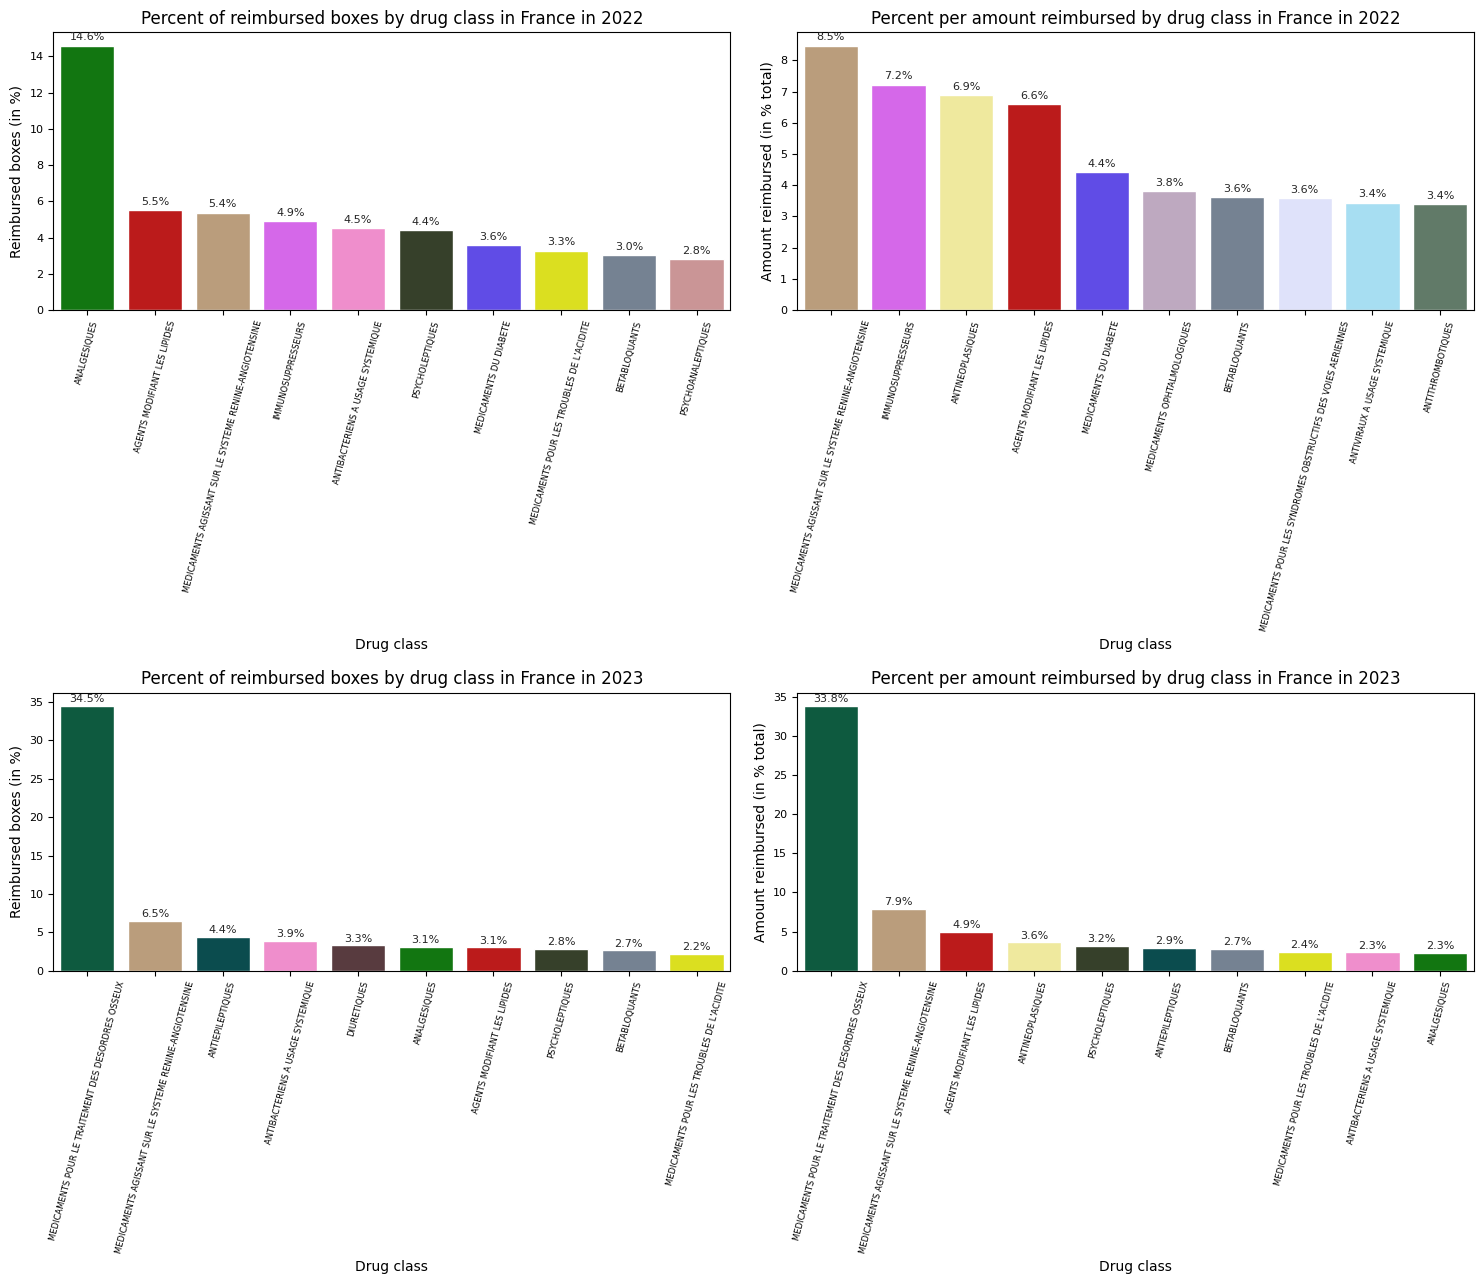

In [37]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15,13))
sns.set(style='whitegrid')

#2022 year
tt_group_2022_15 = indexed_boite_2022.sort_values(by='nb_boite_remboursée_%_2022', ascending=False).head(10)

sns.barplot(data=tt_group_2022_15, x='Libelle_nATC_2', y='nb_boite_remboursée_%_2022', errorbar=None, palette=tt_group_2022_15['color'], width=.8, dodge=False, ax=axes[0,0])
axes[0,0].tick_params(axis='x', rotation=75, labelsize=6)
axes[0,0].yaxis.set_tick_params(labelsize=8)
axes[0,0].set_ylabel('Reimbursed boxes (in %)', fontsize=10)
axes[0,0].set_xlabel('Drug class', fontsize=10, labelpad=32)
axes[0,0].set_title('Percent of reimbursed boxes by drug class in France in 2022')
axes[0,0].legend().remove()
ax = plt.gca()
for index, row in tt_group_2022_15.iterrows():
    axes[0,0].text(index, row['nb_boite_remboursée_%_2022'] + 0.5, f"{row['nb_boite_remboursée_%_2022']:.1f}%", ha='center', va='center_baseline', fontsize=8)


tt_group_2022_151 = indexed_remb_2022.sort_values(by='montant_remboursé_%_2022', ascending=False).head(10)

sns.barplot(x=tt_group_2022_151['Libelle_nATC_2'], y=tt_group_2022_151['montant_remboursé_%_2022'], errorbar=None, palette=tt_group_2022_151['color'], width=.8, dodge=False, ax=axes[0,1])
axes[0,1].tick_params(axis='x', rotation=75, labelsize=6)
axes[0,1].yaxis.set_tick_params(labelsize=8)
axes[0,1].set_ylabel('Amount reimbursed (in % total)', fontsize=10)
axes[0,1].set_xlabel('Drug class', fontsize=10)
axes[0,1].set_title('Percent per amount reimbursed by drug class in France in 2022')
axes[0,1].legend().remove()
ax = plt.gca()
for index, row in tt_group_2022_151.iterrows():
    axes[0,1].text(index, row['montant_remboursé_%_2022'] + 0.3, f"{row['montant_remboursé_%_2022']:.1f}%", ha='center', va='center_baseline', fontsize=8)

#2023 Year
tt_group_2023_15 = indexed_boite_2023.sort_values(by='nb_boite_remboursée_%_2023', ascending=False).head(10)

sns.barplot(data=tt_group_2023_15, x='Libelle_nATC_2', y='nb_boite_remboursée_%_2023', errorbar=None, palette=tt_group_2023_15['color'], width=.8, dodge=False, ax=axes[1,0])
axes[1,0].tick_params(axis='x', rotation=75, labelsize=6)
axes[1,0].yaxis.set_tick_params(labelsize=8)
axes[1,0].set_ylabel('Reimbursed boxes (in %)', fontsize=10)
axes[1,0].set_xlabel('Drug class', fontsize=10)
axes[1,0].set_title('Percent of reimbursed boxes by drug class in France in 2023')
axes[1,0].legend().remove()
ax = plt.gca()
for index, row in tt_group_2023_15.iterrows():
    axes[1,0].text(index, row['nb_boite_remboursée_%_2023'] + 1, f"{row['nb_boite_remboursée_%_2023']:.1f}%", ha='center', va='center_baseline', fontsize=8)

tt_group_2023_151 = indexed_remb_2023.sort_values(by='montant_remboursé_%_2023', ascending=False).head(10)

sns.barplot(x=tt_group_2023_151['Libelle_nATC_2'], y=tt_group_2023_151['montant_remboursé_%_2023'], errorbar=None, palette=tt_group_2023_151['color'], width=.8, dodge=False, ax=axes[1,1])
axes[1,1].tick_params(axis='x', rotation=75, labelsize=6)
axes[1,1].yaxis.set_tick_params(labelsize=8)
axes[1,1].set_ylabel('Amount reimbursed (in % total)', fontsize=10)
axes[1,1].set_xlabel('Drug class', fontsize=10)
axes[1,1].set_title('Percent per amount reimbursed by drug class in France in 2023')
axes[1,1].legend().remove()
ax = plt.gca()
for index, row in tt_group_2023_151.iterrows():
    axes[1,1].text(index, row['montant_remboursé_%_2023'] + 1, f"{row['montant_remboursé_%_2023']:.1f}%", ha='center', va='center_baseline', fontsize=8)

plt.tight_layout()
plt.show()

**Comments**:
For the year 2022:
- The drugs that were delivered the most (number of boxes) were analgesics with 14.6% of boxes delivered in total in France. Followed by lipid modifying drugs (5.5%) then renin angiotensin system (RAS) drugs (5.4%)
- In terms of reimbursement, we see that it is not necessarily the most dispensed medications that cost the most for social security. However, we find RAS medications in first place (8.5% of the total amount reimbursed by social security), followed by immunosuppressants (7.2%) and antineoplastics (6.9%).

Note that analgesics are only found in 11th place among medications reimbursed by social security (3.02%).
On the contrary, antineoplastic drugs are in 3rd position in the ranking by total amount reimbursed, and are in 37th place by number of boxes delivered.

A total of 2 325 136 056 boxes were payed by the social security, for an amount of 22 665 769 177.3€

For the year 2023:
- The most dispensed medications are medications for bones disorders (34.4%), followed by RAS medications (6.5%) and antiepileptics (4.4%).
- In terms of reimbursement, we find essentially the same top 3 with drugs for bone disorders in 1st position (33.8%), those for RAS in 2nd position (7.9%), then drugs modifying lipids (4.9%)

We note that antiepileptics are in 6th place in the ranking by amount reimbursed.
And that lipid-modifying drugs are in 7th place in the ranking by number of boxes reimbursed by social security.

For comparison, antineoplastics are in 4th place in terms of reimbursement, but 19th in number of boxes delivered.

A total of 3 508 602 605 boxes were payed by the social security, for an amount of 36 861 835 550.3€

**Conclusions** : 
French social security reimbursed 1 billion additional boxes between 2022 and 2023. and getting a cost of 14 billion additional euros.

**Openings** : 
It could be interesting to evaluate the most prescribed drugs in the most expensive classes in detail for social security and check if the treatment indications are being respected.
Likewise, it could be interesting to compare the increase in drugs prescriptions for bones disorders with the change in treatment recommendations between the 2 years.